In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb
import sklearn as skl
import time
from IPython.display import display, clear_output

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24



Pandas   1.2.4
Sklearn  0.24.1


### Data Importing

In [11]:
import os
os.environ['KAGGLE_USERNAME'] = "umutakta"
os.environ['KAGGLE_KEY']      = "a471e5474add8d57cadac3cc5ff2b1d6"
#!kaggle competitions download -c tabular-playground-series-feb-2021

 93%|███████████████████████████████████▎  | 61.0M/65.7M [00:00<00:00, 91.8MB/s]
100%|██████████████████████████████████████| 65.7M/65.7M [00:00<00:00, 83.0MB/s]


In [13]:
path = "./tabular-playground-feb21/"
#path= "/work/Strive_School/Feature_Engineering_(Module_4)/Day_3_Numerical_Encoding/2. Notebooks/tabular-playground-series-feb-2021"
!ls $path

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ls /work/Strive_School/Feature_Engineering_(Module_4)/Day_3_Numerical_Encoding/2. Notebooks/tabular-playground-series-feb-2021'


### Load data

In [32]:
# 1 point 
 #load the train, test and sample_submission data using the is as the index column
df = pd.read_csv(path+"/train.csv")
df_t = pd.read_csv(path+"/test.csv")
sub = pd.read_csv(path+"/sample_submission.csv")
df=df.drop("id",axis=1)
df_t=df_t.drop("id",axis=1)
sub=sub.drop("id",axis=1)

print("Train dataframe:", df.shape)
print("Test dataframe:", df_t.shape)
df.head()

Train dataframe: (300000, 25)
Test dataframe: (200000, 24)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [33]:
print(sub.shape)
assert df.shape == (300000,25) 
assert df_t.shape == (200000,24) 
assert sub.shape == (200000,1) 

(200000, 1)


### Subsample the data

In [34]:
#1 point
# get a random sample of size 50k, tested with random state 0
dfs = None
# YOUR CODE HERE
dfs=df.loc[:50000-1]
dfs

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A,B,A,A,B,B,A,E,E,F,...,0.256971,0.336571,0.741356,0.256341,0.318665,0.354503,0.728279,0.254745,0.807722,7.682357
49996,A,A,A,C,B,B,A,E,C,F,...,0.358257,0.405109,0.349359,0.424799,0.648600,0.697210,0.204742,0.356191,0.672398,7.777742
49997,A,B,A,A,B,D,A,E,E,F,...,0.911446,0.220975,0.666341,0.319034,0.146933,0.358808,0.246961,0.494167,0.671426,7.983618
49998,A,B,A,D,B,D,A,E,G,L,...,0.695620,0.398852,0.643599,0.313664,0.587418,0.303532,0.678021,0.372788,0.273726,7.001852


In [35]:
assert dfs.shape == (50000,25)

### There are no missings in this dataset

In [36]:
df.isna().sum().sum(), df_t.isna().sum().sum()

(0, 0)

In [37]:
df.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

### Define variables for x and y

In [51]:
cat_vars = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_vars = ['cont0', 'cont1', 'cont2', 'cont3',  'cont4',  'cont5',  'cont6',
            'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

# 1 point 
# store in X all the categorical and numerical columns
# store in Y the target


# YOUR CODE HERE
x = dfs[cat_vars+num_vars]
y = dfs[["target"]].to_numpy()
y=np.reshape(y,(50000,))
y.shape

(50000,)

In [52]:
assert x.shape == (50000,24)
assert y.shape == (50000,)

### See the target variable ([The metric is RMSE](https://www.kaggle.com/c/tabular-playground-series-feb-2021/overview/evaluation))

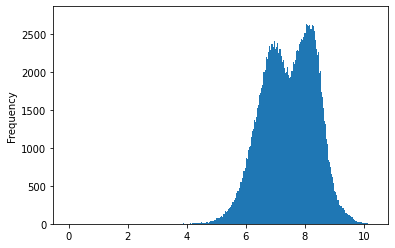

In [53]:
df.target.plot.hist(bins=500);

### See the numerical variables

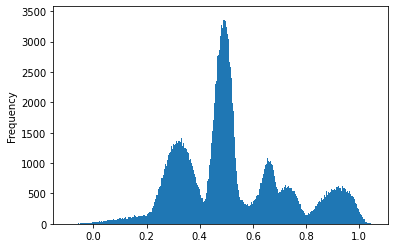

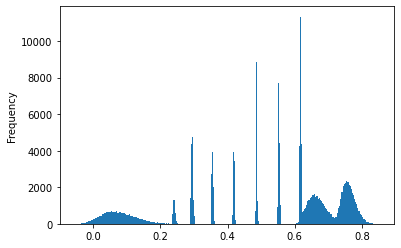

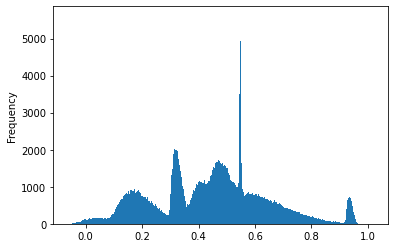

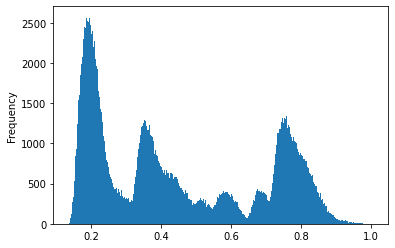

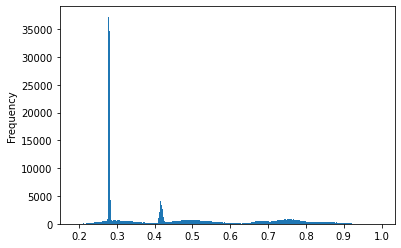

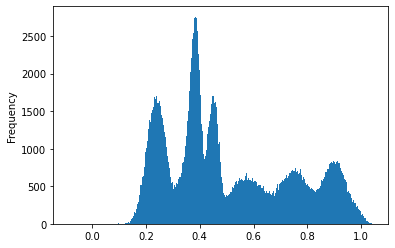

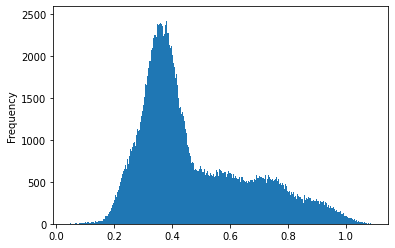

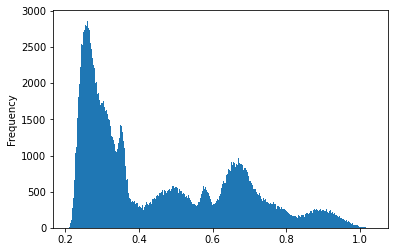

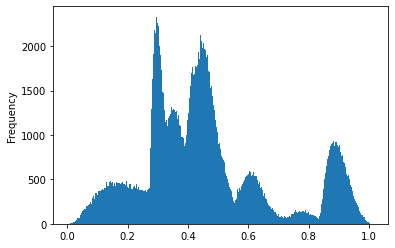

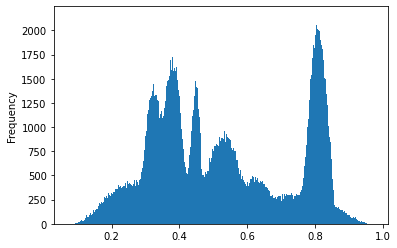

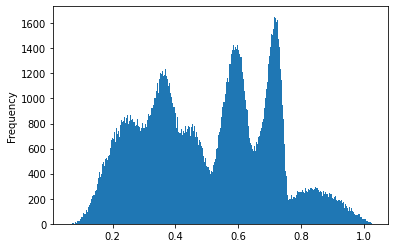

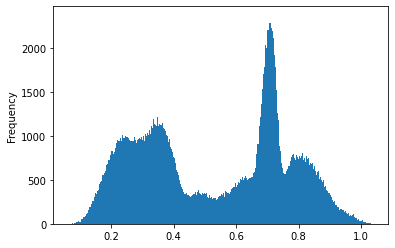

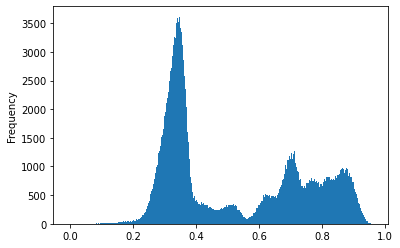

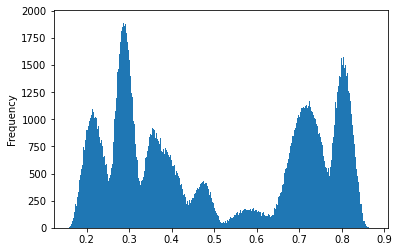

In [54]:
for var in num_vars:
    df[var].plot.hist(bins=500)
    plt.show();

### See the categorical variables (ypu can use `bar()`, `barh()` or `.pie()`)

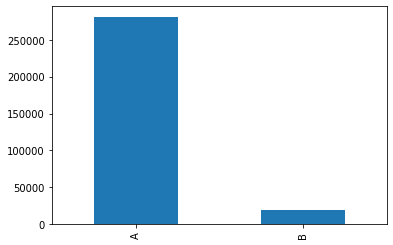

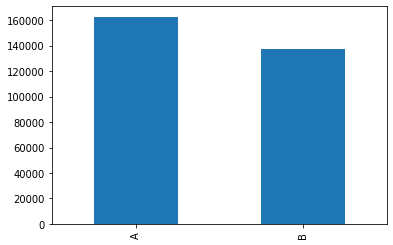

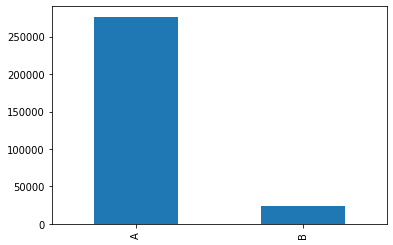

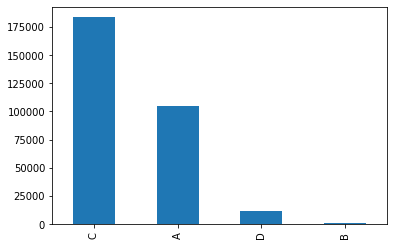

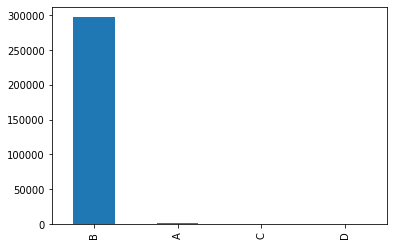

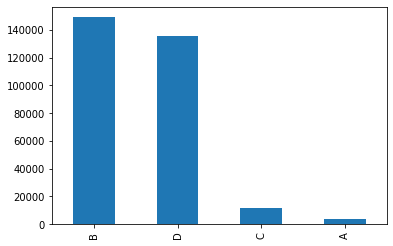

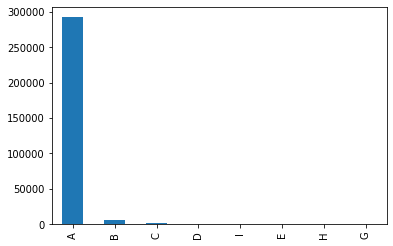

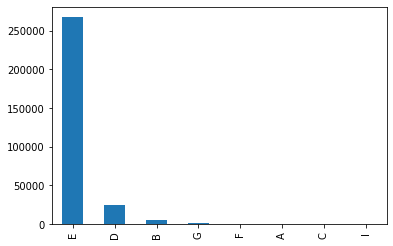

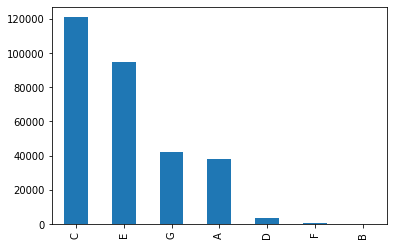

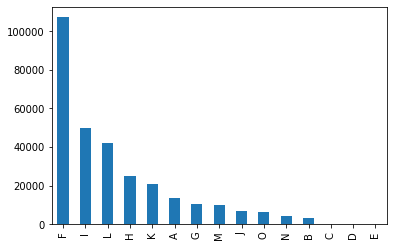

In [57]:
for var in cat_vars:
    df[var].value_counts().plot.bar()
    #df[var].value_counts().plot.barh()
    #df[var].value_counts().plot.pie()
    plt.show();

# Exercise 1 (2 pts)

Create the `ColumTransformer` for **models based on multiplications and distances**:
- Pipeline for numerical variables (`num_vars`): `Standardscaler()` or `QuantileTransformer(n_quantiles=100, output_distribution='normal')`
- Pipeline for categorical variables (`cat_vars`): `OneHotEncoder(handle_unknown='ignore')`

In [62]:
# YOUR CODE HERE
cat_4_Models = pipeline.Pipeline(steps=[
    ('one hot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])


num_4_Models=pipeline.Pipeline(steps=[
    (("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0,
    output_distribution='normal')))])



tree_prepro=compose.ColumnTransformer(transformers=[
    ("categorical",cat_4_Models,cat_vars),
    ("numerical",num_4_Models,num_vars)]) 

tree_prepro


ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9']),
                                ('numerical',
                                 Pipeline(steps=[('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal',
                                                                      random_state=0))]),
                                 ['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                  'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                  'cont10', 'cont11', 'cont12', 'cont13'])])

In [63]:
assert type(tree_prepro) is sklearn.compose._column_transformer.ColumnTransformer

# Exercise 2 (2 pts)

Create the `ColumTransformer` for **models based on trees**:
- Pipeline for numerical variables (`num_vars`): **Do nothing**. Tip: You can use `remainder='passthrough'` when you create the `ColumTransformer`.
- Pipeline for categorical variables (`cat_vars`): `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)[source]`

In [65]:
# YOUR CODE HERE


mult_prepro=tree_prepro

In [66]:
assert type(mult_prepro) is sklearn.compose._column_transformer.ColumnTransformer

## Exercise 3 (2pts)
Reasearch about som models and its hyperparamters

In [93]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor


In [102]:
# YOUR CODE HERE
all_pipelines={
    #"Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": linear_model.Lasso(alpha=0.1),
    "Elastic Net":ElasticNet(random_state=0),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=2),
    "Random Forest Regressor":RandomForestRegressor(max_depth=2, random_state=0),
    "Extra Tree Regressor":ExtraTreesRegressor(n_estimators=10, random_state=0),
    "Gradient Boosting Regressor":GradientBoostingRegressor(random_state=0),
    #"Gradient Hist  Boosting Regressor":HistGradientBoostingRegressor()
    
    }

all_pipelines = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in all_pipelines.items()}

all_pipelines["Extra Tree Regressor"]




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'cat7', 'cat8',
                                                   'cat9']),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13'])])),
                ('extratreesregressor',
                 ExtraTreesRegressor(n_estimators=10, random_state=0))])

In [103]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)

results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in all_pipelines.items():

    start_time = time.time()
    
    preds = pipe.fit(x_train,y_train).predict(x_valid)

    total_time = time.time() - start_time

    results = results.append({"Model": name,
                              "MSE":   mean_squared_error(y_valid, preds),
                              "RMSE":  mean_squared_error(y_valid, preds,squared=False),
                              "Time":  total_time},
                              ignore_index=True)

    
    results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))

,Model,MSE,RMSE,Time
1,Gradient Boosting Regressor,0.728042,0.853254,29.267249
2,Ridge,0.738911,0.859599,0.995578
3,Random Forest Regressor,0.760802,0.872239,12.039198
4,Decision Tree Regressor,0.762817,0.873394,1.048871
5,Lasso,0.782525,0.884604,0.993323
6,Elastic Net,0.782525,0.884604,0.949063
7,Extra Tree Regressor,0.829453,0.910743,4.506836


In [104]:
assert results_ord['MSE'].max() < 2
assert results_ord['MSE'].min() < 0.8
assert results_ord['RMSE'].max() < 1.5
assert results_ord['RMSE'].min() < 0.9

### Optional Exercise (optional because it takes a lot of time of computation)
Train with a more realable validation data the best models (maybe the best 5 models). You can:
- Use all training data (without subsample)
- Use Crosvalidation (`KFold`)(using 3, 5 or 7 folds) instead of `train_test_split`

In [ ]:
df   = pd.read_csv(path+"train.csv", index_col="id")

print("Using all data with", len(df), "rows")
x = df[num_vars+cat_vars]
y = df["target"]

In [ ]:
# IMPLEMENT SOMETHING SIMILAR TO THE PROCESS BEFORE
# BUT USE KFOLD

# YOUR CODE HERE
raise NotImplementedError()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=796ba814-f632-4502-b0d7-7e2f8f9e546d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>